<a href="https://colab.research.google.com/github/alastra32/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
# TODO

# Imports
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Grab the data file from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data

--2019-08-19 02:17:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32218 (31K) [application/x-httpd-php]
Saving to: ‘crx.data.1’

crx.data.1          100%[===================>]  31.46K  --.-KB/s    in 0.03s   

2019-08-19 02:17:19 (1005 KB/s) - ‘crx.data.1’ saved [32218/32218]



In [3]:
# Load the data again to be safe:
df = pd.read_csv('crx.data', 
                 header=None,
                 names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16'])
df = df.replace({'?':np.NaN})
print(df.shape)
df.head()

(690, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.isna().sum() #checking for missing data, we match what was in the CRX Notebook

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [5]:
df.groupby('A16').A16.count() #we get the correct number of positive and negative cases.

A16
+    307
-    383
Name: A16, dtype: int64

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

In [6]:
df.info()#checking for types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null object
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null int64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null object
A15    690 non-null int64
A16    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.3+ KB


In [0]:
df['A2']=df.A2.astype('float64')
df['A11']=df.A11.astype('float64')
df['A14']=df.A14.astype('float64')
df['A15']=df.A15.astype('float64')

In [8]:
df.info() #checking fixes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1     678 non-null object
A2     678 non-null float64
A3     690 non-null float64
A4     684 non-null object
A5     684 non-null object
A6     681 non-null object
A7     681 non-null object
A8     690 non-null float64
A9     690 non-null object
A10    690 non-null object
A11    690 non-null float64
A12    690 non-null object
A13    690 non-null object
A14    677 non-null float64
A15    690 non-null float64
A16    690 non-null object
dtypes: float64(6), object(10)
memory usage: 86.3+ KB


In [9]:
df.describe() #numeric columns

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [10]:
df.describe(exclude='number') #categorical columns

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


In [11]:
#exploring missing data


#A1

df[df['A1'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,NaN,24.50,12.750,u,g,c,bb,4.750,t,t,2.0,f,g,73.0,444.0,+
327,NaN,40.83,3.500,u,g,i,bb,0.500,f,f,0.0,f,s,1160.0,0.0,-
346,NaN,32.25,1.500,u,g,c,v,0.250,f,f,0.0,t,g,372.0,122.0,-
374,NaN,28.17,0.585,u,g,aa,v,0.040,f,f,0.0,f,g,260.0,1004.0,-
453,NaN,29.75,0.665,u,g,w,v,0.250,f,f,0.0,t,g,300.0,0.0,-
479,NaN,26.50,2.710,y,p,NaN,NaN,0.085,f,f,0.0,f,s,80.0,0.0,-
489,NaN,45.33,1.000,u,g,q,v,0.125,f,f,0.0,t,g,263.0,0.0,-
520,NaN,20.42,7.500,u,g,k,v,1.500,t,t,1.0,f,g,160.0,234.0,+
598,NaN,20.08,0.125,u,g,q,v,1.000,f,t,1.0,f,g,240.0,768.0,+
601,NaN,42.25,1.750,y,p,NaN,NaN,0.000,f,f,0.0,t,g,150.0,1.0,-


In [12]:
#A2

df[df['A2'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
83,a,NaN,3.500,u,g,d,v,3.000,t,f,0.0,t,g,300.0,0.0,-
86,b,NaN,0.375,u,g,d,v,0.875,t,f,0.0,t,s,928.0,0.0,-
92,b,NaN,5.000,y,p,aa,v,8.500,t,f,0.0,f,g,0.0,0.0,-
97,b,NaN,0.500,u,g,c,bb,0.835,t,f,0.0,t,s,320.0,0.0,-
254,b,NaN,0.625,u,g,k,v,0.250,f,f,0.0,f,g,380.0,2010.0,-
286,a,NaN,1.500,u,g,ff,ff,0.000,f,t,2.0,t,g,200.0,105.0,-
329,b,NaN,4.000,y,p,i,v,0.085,f,f,0.0,t,g,411.0,0.0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0.0,f,g,NaN,5200.0,-
450,b,NaN,3.000,y,p,i,bb,7.000,f,f,0.0,f,g,0.0,1.0,-
500,b,NaN,4.000,u,g,x,v,5.000,t,t,3.0,t,g,290.0,2279.0,+


In [13]:
#A4

df[df['A4'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+
270,b,37.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+
330,b,20.42,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,-
456,b,34.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,-
592,b,23.17,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+
622,a,25.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+


In [14]:
#A5

df[df['A5'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+
270,b,37.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+
330,b,20.42,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,-
456,b,34.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,-
592,b,23.17,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+
622,a,25.58,0.0,NaN,NaN,NaN,NaN,0.0,f,f,0.0,f,p,NaN,0.0,+


In [15]:
#A6

df[df['A6'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
270,b,37.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
330,b,20.42,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,-
456,b,34.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,-
479,NaN,26.50,2.71,y,p,NaN,NaN,0.085,f,f,0.0,f,s,80.0,0.0,-
539,b,80.25,5.50,u,g,NaN,NaN,0.540,t,f,0.0,f,g,0.0,340.0,-
592,b,23.17,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
601,NaN,42.25,1.75,y,p,NaN,NaN,0.000,f,f,0.0,t,g,150.0,1.0,-
622,a,25.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+


In [16]:
#A7

df[df['A7'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
206,a,71.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
270,b,37.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
330,b,20.42,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,-
456,b,34.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,-
479,NaN,26.50,2.71,y,p,NaN,NaN,0.085,f,f,0.0,f,s,80.0,0.0,-
539,b,80.25,5.50,u,g,NaN,NaN,0.540,t,f,0.0,f,g,0.0,340.0,-
592,b,23.17,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
601,NaN,42.25,1.75,y,p,NaN,NaN,0.000,f,f,0.0,t,g,150.0,1.0,-
622,a,25.58,0.00,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+


In [17]:
#A14

df[df['A14'].isna()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
71,b,34.83,4.000,u,g,d,bb,12.500,t,f,0.0,t,g,NaN,0.0,-
202,b,24.83,2.750,u,g,c,v,2.250,t,t,6.0,f,g,NaN,600.0,+
206,a,71.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
243,a,18.75,7.500,u,g,q,v,2.710,t,t,5.0,f,g,NaN,26726.0,+
270,b,37.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,+
278,b,24.58,13.500,y,p,ff,ff,0.000,f,f,0.0,f,g,NaN,0.0,-
330,b,20.42,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,-
406,a,40.33,8.125,y,p,k,v,0.165,f,t,2.0,f,g,NaN,18.0,-
445,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0.0,f,g,NaN,5200.0,-
456,b,34.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0.0,f,p,NaN,0.0,-


In [18]:
#dropping NANs as they are randomly distributed across both + and - and affect both outcomes

df1=df.dropna()
print(df1.shape)
df1.head()

(653, 16)


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1.0,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6.0,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0.0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5.0,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0.0,f,s,120.0,0.0,+


In [51]:
df.groupby('A16').A16.count()

A16
+    307
-    383
Name: A16, dtype: int64

In [52]:

df1.groupby('A16').A16.count()

A16
+    296
-    357
Name: A16, dtype: int64

In [54]:
(307-296)/307


0.035830618892508145

In [55]:
(383-357)/383

0.06788511749347259

In [56]:
(296+357)/690

0.946376811594203

In [0]:
#Although dropping the NANs affects twice as much the negative than the positive, it's still only 4% and 7% respectively of the overall data. I don't see any clear correlations of the NANs as to apply any method that wouldn't add more noise to the data.

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [63]:
df1.describe() #numeric columns

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [64]:
df1.describe(exclude='number') #categorical columns

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,653,653,653,653,653,653,653,653,653,653
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,450,499,499,133,381,349,366,351,598,357


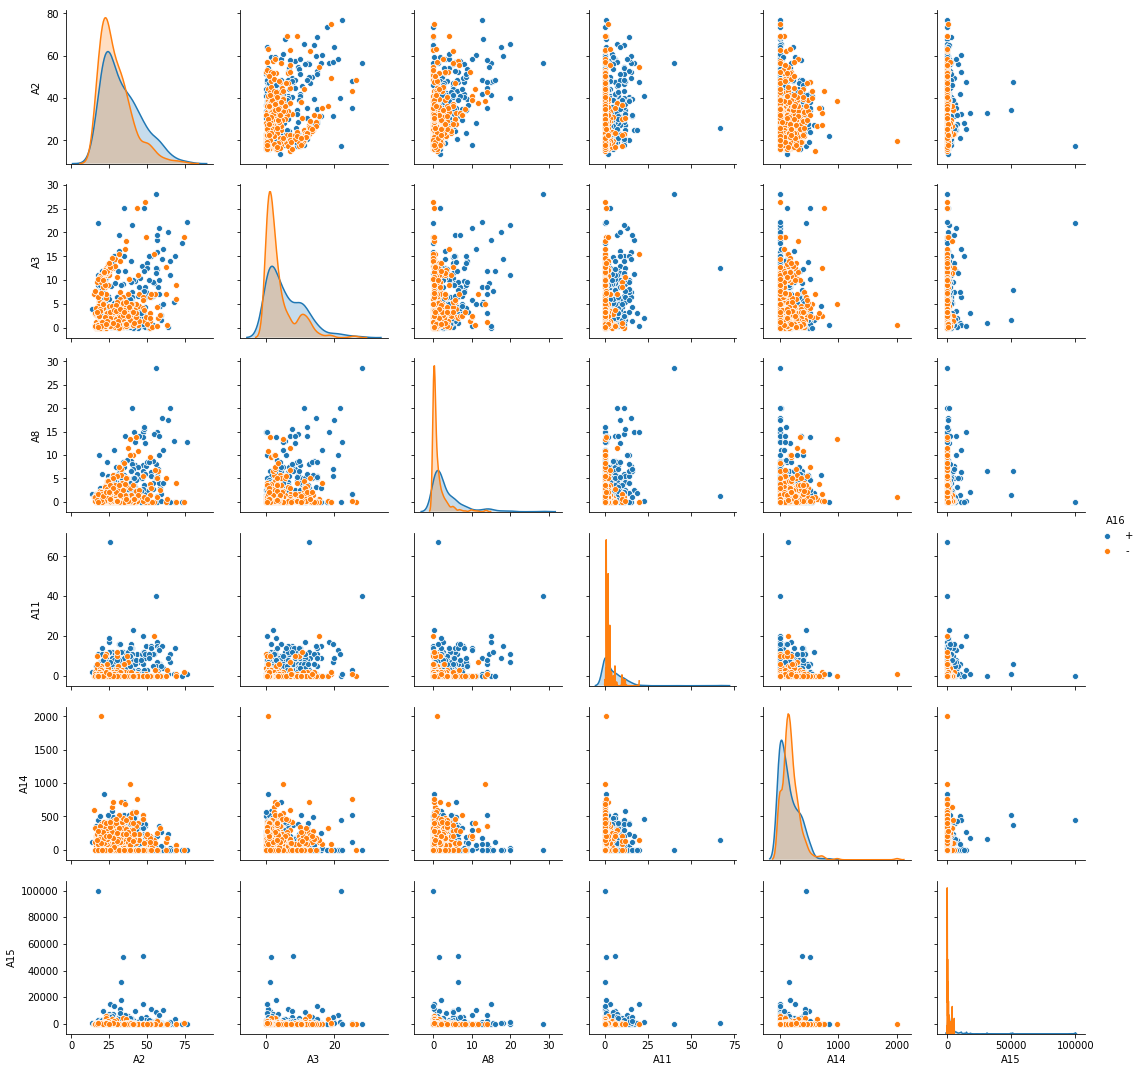

In [61]:
sns.pairplot(df1,hue='A16');

In [62]:
df1.corr() #correlations among numerical columns

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.217681,0.417647,0.198153,-0.084618,0.029078
A3,0.217681,1.000000,0.300600,0.269834,-0.217076,0.119754
A8,0.417647,0.300600,1.000000,0.327325,-0.064781,0.052159
A11,0.198153,0.269834,0.327325,1.000000,-0.116101,0.058408
A14,-0.084618,-0.217076,-0.064781,-0.116101,1.000000,0.073384
A15,0.029078,0.119754,0.052159,0.058408,0.073384,1.000000


In [0]:
#splitting

dfpos=df1[df1['A16']=='+']
dfneg=df1[df1['A16']=='-']

In [23]:
dfpos.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.257836,0.462613,0.193931,-0.126853,0.000063
A3,0.257836,1.000000,0.370771,0.268011,-0.324144,0.108180
A8,0.462613,0.370771,1.000000,0.264481,-0.182452,-0.002473
A11,0.193931,0.268011,0.264481,1.000000,-0.124213,-0.014396
A14,-0.126853,-0.324144,-0.182452,-0.124213,1.000000,0.135497
A15,0.000063,0.108180,-0.002473,-0.014396,0.135497,1.000000


In [24]:
dfneg.corr()

,A2,A3,A8,A11,A14,A15
A2,1.000000,0.101209,0.269879,0.019732,-0.019466,-0.035391
A3,0.101209,1.000000,0.017786,0.080446,-0.091560,0.104151
A8,0.269879,0.017786,1.000000,0.013301,0.184912,-0.083564
A11,0.019732,0.080446,0.013301,1.000000,-0.052722,0.018823
A14,-0.019466,-0.091560,0.184912,-0.052722,1.000000,0.026168
A15,-0.035391,0.104151,-0.083564,0.018823,0.026168,1.000000


In [42]:
categorical=list(df1.describe(exclude='number').columns)
categorical

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'A16']

In [57]:
for col in categorical:
  a=pd.crosstab(df1['A16'],df1[col])
  print(a)

A1     a    b
A16          
+     95  201
-    108  249
A4   l    u    y
A16             
+    2  249   45
-    0  250  107
A5     g  gg    p
A16              
+    249   2   45
-    250   0  107
A6   aa   c  cc   d   e  ff   i  j   k   m   q  r   w   x
A16                                                      
+    19  60  29   7  14   7  14  3  13  16  49  2  33  30
-    33  73  11  19  10  43  41  7  35  22  26  1  30   6
A7   bb  dd  ff   h  j  n  o    v  z
A16                                 
+    24   2   8  87  3  2  1  163  6
-    29   4  46  50  5  2  1  218  2
A9     f    t
A16          
+     18  278
-    286   71
A10    f    t
A16          
+     93  203
-    273   84
A12    f    t
A16          
+    151  145
-    200  157
A13    g  p   s
A16            
+    280  1  15
-    318  1  38


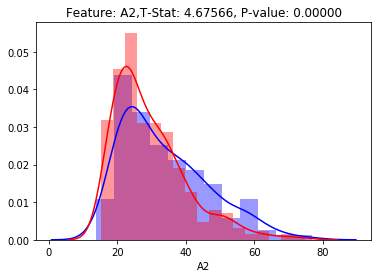

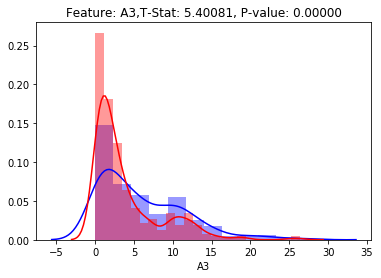

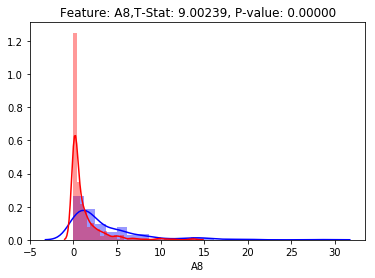

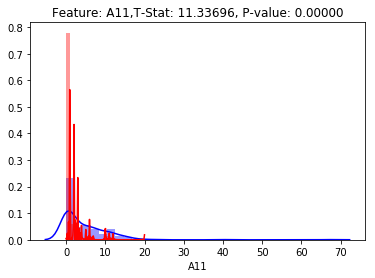

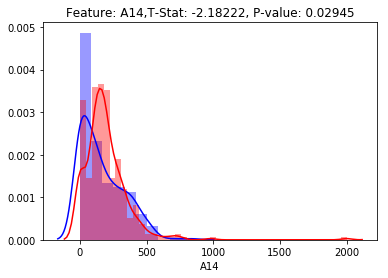

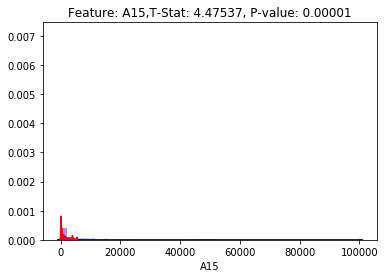

<Figure size 432x288 with 0 Axes>

In [40]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

numeric=list(df1.describe().columns)
for feat in numeric:
  # Split groups
  group1 = df1[df1['A16'] == '+'][feat]
  group2 =  df1[df1['A16'] == '-'][feat]
  
  # Plot distribution
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # Run t-test
  tstat, pvalue = ttest_ind(group1, group2)
  
  # Plot
  plt.title(f'Feature: {feat},T-Stat: {tstat:.5f}, P-value: {pvalue:.5f}')
  plt.figure();

In [85]:
#calculating Chisquared across al categorical columns
categorical=list(df1.describe(exclude='number').columns)[:-1]
categorical

for col in categorical:
  observed = pd.crosstab(df1['A16'], df1[col]).values
  chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
  print(col,chi_squared,p_value, dof)

A1 0.17764082160253514 0.6734085695133722 1
A4 21.78325079317282 1.8613463470618034e-05 2
A5 21.78325079317282 1.8613463470618034e-05 2
A6 89.76481160702343 1.5500154549498966e-13 13
A7 42.988254470828515 8.829142688919391e-07 8
A9 353.4827159410316 7.391616628555818e-79 1
A10 131.50867232095965 1.9163536191857147e-30 1
A12 1.4379377134356208 0.23047335495661603 1
A13 6.756491933104269 0.03410722751542202 2


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

- **Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?**



For feature **A8** we can observe different distributions for positive and negative applications. Though both distributions have long tails and skew towards the right, we see that the positive distribution has wider distribution than the negative. The T-test for this feature across both populations gives a p-value of 2.4079238505859142e-18 which can be rounded to zero, therefore we can reject the Null-Hypothesis and state that the Populations of applicants being accepted and rejected are statistically significantly different for this feature A8.

2.4079238505859142e-18


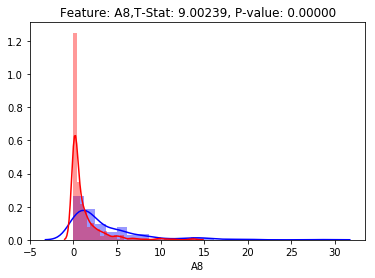

<Figure size 432x288 with 0 Axes>

In [80]:

for feat in numeric[2:3]:
  # Split groups
  group1 = df1[df1['A16'] == '+'][feat]
  group2 =  df1[df1['A16'] == '-'][feat]
  
  # Plot distribution
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # Run t-test
  tstat, pvalue = ttest_ind(group1, group2)
  
  # Plot
  plt.title(f'Feature: {feat},T-Stat: {tstat:.5f}, P-value: {pvalue:.5f}')
  plt.figure();
  print(pvalue)

For feature **A14** we can observe different distributions for positive and negative applications. Though both distributions have long tails and skew towards the right, we see that the negative distribution is wider. The T-test for this feature across both populations gives a p-value of 0.029450100409286473 which can be rounded to 0.02945, therefore we can also reject the Null-Hypothesis and state that the Populations of applicants being accepted and rejected are statistically significantly different for this feature A14.

0.029450100409286473


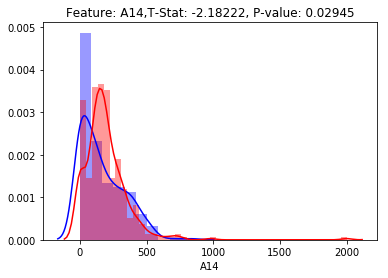

<Figure size 432x288 with 0 Axes>

In [82]:

for feat in numeric[4:5]:
  # Split groups
  group1 = df1[df1['A16'] == '+'][feat]
  group2 =  df1[df1['A16'] == '-'][feat]
  
  # Plot distribution
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # Run t-test
  tstat, pvalue = ttest_ind(group1, group2)
  
  # Plot
  plt.title(f'Feature: {feat},T-Stat: {tstat:.5f}, P-value: {pvalue:.5f}')
  plt.figure();
  print(pvalue)

- **Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?**


For the feature **A9** and the class labels,  we see the Chi-squared test returns an extreme result where the p-value is 7.391616628555818e-79 which can be rounded to zero.. Therefore, we can reject the Null Hypothesis and state that the approved and rejected populations are not independent of the categories for feature A9. We can observe this  extreme in the high Chi-Squared Test value of 353.48.

In [87]:
observed = pd.crosstab(df1['A16'], df1['A9']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

353.4827159410316 7.391616628555818e-79 1 [[137.80091884 158.19908116]
 [166.19908116 190.80091884]]


For the feature **A13** and the class labels,  we see the Chi-squared test returns a less extreme result with a p-value of 0.03. Therefore, we can reject the Null Hypothesis and state that the approved and rejected populations are not independent of the categories for feature A13. We can observe this in the lower Chi-Squared Test value of 6.76.

In [88]:
observed = pd.crosstab(df1['A16'], df1['A13']).values
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

6.756491933104269 0.03410722751542202 2 [[271.06891271   0.90658499  24.0245023 ]
 [326.93108729   1.09341501  28.9754977 ]]


- **What was the most challenging part of this sprint challenge?**

The most challenging part of this sprint challenge was determining which features to use for each T-Test and Chi-Squared to respond to the question. Moreover, I also found challenging to determine if I was making a correct assumption around what to do with the missing data.